In [1]:
# Set up.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%load_ext autoreload
%autoreload 2

As annotated in the README, determining course and speed of ships using bearings only simply isn't possible. This is already pretty well documented, but even trying to apply machine learning algorithms results in way too many ambiguous solutions.

I will have to make some of the images myself. I'm going to make a list of colors that I'll need.

I found a diagram of light orientations that I'm going to use.

In [2]:
targets = np.array(['Power-driven vessel underway (>50m in length) (starboard)',
                    'Power-driven vessel underway (>50m in length) (port)',
                    'Power-driven vessel underway (>50m in length) (stern)',
                    'Power-driven vessel underway (>50m in length) (bow)',
                    'Power-driven vessel underway (<50m in length) (starboard)',
                    'Power-driven vessel underway (<50m in length) (port)',
                    'Power-driven vessel underway (<50m in length) (stern)',
                    'Power-driven vessel underway (<50m in length) (bow)',
                    'Power-driven vessel underway (<12m in length) (starboard)',
                    'Power-driven vessel underway (<12m in length) (port)',
                    'Power-driven vessel underway (<12m in length) (stern)',
                    'Power-driven vessel underway (<12m in length) (bow)',
                    'Power-driven vessel underway (<7m in length) (starboard)',
                    'Power-driven vessel underway (<7m in length) (port)',
                    'Power-driven vessel underway (<7m in length) (stern)',
                    'Power-driven vessel underway (<7m in length) (bow)'], dtype=np.dtype('unicode_'))

In [3]:
colors = np.array([[(255, 0, 0), (255, 255, 255), (0, 255, 0)],
                [(0, 0, 0), (255, 255, 0), (0, 0, 0)]], dtype=np.uint8)

In [4]:
black = [[(0, 0, 0) for _ in range(255)] for _ in range(255)]

In [5]:
black_array = np.array(black, dtype=np.uint8)

In [6]:
black_array[100:131, 100:131] = (0, 0, 0)

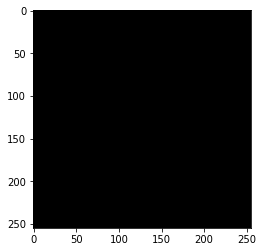

In [7]:
plt.imshow(black_array)
plt.show();